# C-means algorithm

In [1]:
import numpy as np
from sympy import init_printing, symbols, Matrix, Eq, Rational, root
from IPython.core.display import HTML
init_printing()

In [2]:
m = 2 ### let fuzziness factor = 2

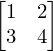

In [3]:
X = np.array([
    [1, 2],
    [3, 4]
])

Xm = Matrix(X)
Xm

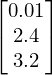

In [4]:
C = np.array([0.01, 2.4, 3.2])
Cm = Matrix(C)
Cm

### Creating Distance matrix
$$ \text{Distance between each point in matrix and each Center}$$
$$ |x_{ij} - c_i|$$

In [5]:
## initialize matrix with shape 3x4
D = np.zeros((3, 4))
D

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
for i, x in enumerate(X.flatten()):
    for j, c in enumerate(C):
        D[j][i] = abs(x - c)

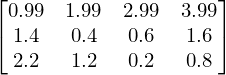

In [7]:
Matrix(D)

###  $$ Membership\; matrix$$
### $$ \mu_{c*n} $$
$$Shape (c x n)$$
$$c:\; num\; of\; centers$$
$$n:\; num\; of\; points\;$$
$$c = 3, n = 4$$
$$ \mu_{3*4} $$

In [8]:
## initialize matrix with shape 3x4
Mio = np.zeros((3, 4))
Mio

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

#### Update Membership matrix

In [9]:
for c in range(D.shape[1]):
    a= []
    for d in D[:, c]:
        s = 0
        for i, _ in enumerate(D[:, 0]):
            s += ((d**m) / D[i, 0]**m)
        a.append(s)
    norm = [round(float(i)/sum(a), 2) for i in a]
    Mio[:, c] = norm

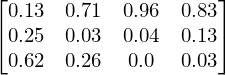

In [10]:
Matrix(Mio)

### Updating Centers

$$ C = \frac{\Sigma \mu_i^mX}{\Sigma \mu_i^m}$$

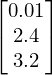

In [11]:
## Old Centers
Cm

In [12]:
C_new = np.zeros(3)
C_new

array([0., 0., 0.])

In [13]:
for r in range(Mio.shape[0]):
    c_up = sum(X.flatten()* Mio[r])
    c_down = sum(Mio[r])
    c = c_up / c_down
    C_new[r] = round(c, 2)
C_new

array([2.95, 2.11, 1.38])

### updated Centers

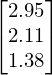

In [14]:
Matrix(C_new)


<hr style="border: 5px solid tomato">

## Functional way

### Distance Matrix

In [15]:
def calculate_distance(X, C):
    '''
    takes
        Data points    (n * n)
        centers vector (c * 1)
    returns 
        Distance Matrix (c * n)
    '''
    for i, x in enumerate(X.flatten()):
        for j, c in enumerate(C):
            D[j][i] = abs(x - c)
    return D

### Memebership matrix

### $$ \mu_{ij} = \Sigma \frac{d_i}{d_j} $$
$$ where$$
$$d_i = |x_i - c_j|$$
$$d_j = |x_i - c_k|$$

In [16]:
def update_membership(D, m = 2):
    '''
    Takes 
        D: Distance matrix (c * n)
        m: fuzziness factor (default 2)
    return
        Membership matrix normalized (c * n)
    '''
    # loop through Distance Matrix columns
    for c in range(D.shape[1]):
        # list to append each column
        a= []
        # calculate the membership
        for d in D[:, c]:
            s = 0
            for i, _ in enumerate(D[:, 0]):
                s += ((d**m) / D[i, 0]**m)
            a.append(s)
        # normalize values
        norm = [round(float(i)/sum(a), 2) for i in a]
        # update membership matrix
        Mio[:, c] = norm
    return Mio

### Update Centers

In [17]:
def update_centers(Mio):
    '''
    takes
        Membership matrix normalized (c*n)
    returns
        Centers (c * 1)
    '''
    for r in range(Mio.shape[0]):
        c_up = sum(X.flatten()* Mio[r])
        c_down = sum(Mio[r])
        c = c_up / c_down
        C_new[r] = round(c, 2)
    return C_new

### Run Cell

In [21]:

# threshold = 0.2
m = 2 ### let fuzziness factor = 2
X = np.array([
    [1, 2],
    [3, 4]])

C = np.array([0.01, 2.4, 3.2])

max_margin = 1

best_Mio, best_centers = 0, 0

for i in range(10):
    
    D = calculate_distance(X, C)
    
    Mio = update_membership(D)
    
    C = update_centers(Mio)
    
    margin = np.matrix(Mio).max()
    
    if margin < max_margin:
#         print(f"Best Margin = {margin}")
        max_margin = margin
        best_centers = C
        best_Mio = Mio
        
    if i % 2 == 0:
        print(f"iteration: {i}")
        print(f"Best Margin = {max_margin}")
        print("Centers")
        print(C)
        print("=================")

iteration: 0
Best Margin = 0.96
Centers
[2.95 2.11 1.38]
iteration: 2
Best Margin = 0.77
Centers
[3.31 2.02 1.73]
iteration: 4
Best Margin = 0.77
Centers
[3.38 1.78 1.74]
iteration: 6
Best Margin = 0.77
Centers
[3.39 1.73 1.74]
iteration: 8
Best Margin = 0.77
Centers
[3.39 1.73 1.74]


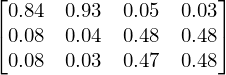

In [22]:
Matrix(best_Mio)

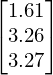

In [23]:
Matrix(best_centers)

$$Such\; Membership\; (\mu)\;\; indicates\; that\;$$
$$ X = 1 \in C_1\; with\; 85\% $$
$$$$
$$ X = 2 \in C_2\; with\; 93\% $$
$$$$
$$ X = 3 \in C_3\; with\; 48\% $$
$$$$
$$ X = 4 \in C_3, C_4\; with\; 48\% $$


<hr style="border: 5px solid tomato">


<hr style="border: 5px solid tomato">